## Example Script for Horizontal Flipping

In [3]:
from PIL import Image, ImageSequence
import vidaug.augmentors as va

In [4]:
def gif_loader(path, modality="RGB"):
    frames = []
    with open(path, 'rb') as f:
        with Image.open(f) as video:
            index = 1
            for frame in ImageSequence.Iterator(video):
                frames.append(frame.convert(modality))
                index += 1
        return frames


In [6]:
frames = gif_loader("../videos/salt.gif")

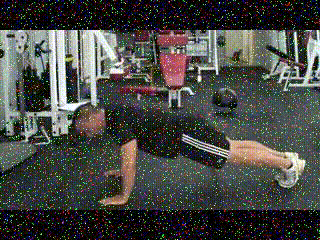

In [7]:
frames[0]

In [8]:
sometimes = lambda aug: va.Sometimes(1, aug) # Used to apply augmentor with 100% probability
seq = va.Sequential([ # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.HorizontalFlip()) # horizontally flip the video with 100% probability
])

In [9]:
#augment the frames
video_aug = seq(frames)

In [10]:
# save augmentad frames as gif 
video_aug[0].save("out.gif", save_all=True, append_images=video_aug[1:], duration=100, loop=0)
